In [59]:
# Analyzed data set that shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
# 1) Identified the most Make_Model EVs that were registered to create a "popularity bar chart"
# 2) A summary statistics was run on the Make_Model EV and their EV range, and only kept the Make-Models with a sem <0.1 and created a scatterplot with a linear correlation to understnad if 
#    the range and popularity are correlated. 


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Data file path
EV_path = "Resources/Electric_Vehicle_Population_Data.csv"

# Read the CSV into a Pandas DataFrame
EV_df = pd.read_csv(EV_path, low_memory=False)

# Print the first five rows of data to the screen
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [89]:
# Create a field to keep tracl of both Make and Model of the EV and then grouped the initial dataset to the count per Make_Model to create the popularity bar chart
EV_df['Make_Model']=EV_df['Make']+' / ' +EV_df['Model']
groupedEV_count = EV_df.groupby('Make_Model')['VIN (1-10)'].count().reset_index(name='Count')
groupedEV_count.head()

,Make_Model,Count
0,ACURA / ZDX,61
1,ALFA ROMEO / TONALE,84
2,AUDI / A3,567
3,AUDI / A7 E,11
4,AUDI / A8 E,3


In [91]:
# Values for the grouped EV dataframe were sorted and only the top 15 were kept to create the popularity bar graph
groupedEV_count = groupedEV_count.sort_values(by='Count', ascending=False)
popularEV_15=groupedEV_count.head(15)
popularEV_15.head(15)

,Make_Model,Count
133,TESLA / MODEL Y,44038
130,TESLA / MODEL 3,32520
113,NISSAN / LEAF,13606
131,TESLA / MODEL S,7795
37,CHEVROLET / BOLT EV,6780
132,TESLA / MODEL X,6239
41,CHEVROLET / VOLT,4815
143,VOLKSWAGEN / ID.4,4716
53,FORD / MUSTANG MACH-E,4363
76,JEEP / WRANGLER,4116


In [93]:
# Create array for x-axis
x_axis = np.arange(len(popularEV_15))


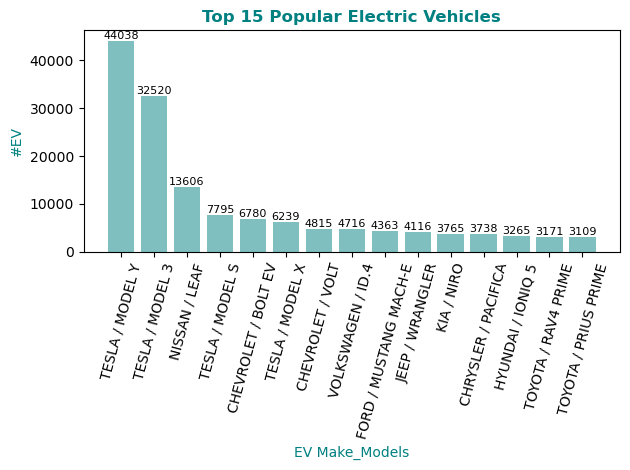

<Figure size 640x480 with 0 Axes>

In [215]:
# Tell matplotlib that we will be making a bar chart
# We apply align="center" to ensure our bars line up with our tick marks

bars = plt.bar(x_axis, popularEV_15["Count"], color='teal', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,popularEV_15["Make_Model"] ,rotation=75)

# Give our chart some labels and a tile
plt.title("Top 15 Popular Electric Vehicles",color="teal",fontweight='bold')
plt.xlabel("EV Make_Models",color="teal")
plt.ylabel("#EV",color="teal")

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, 
             ha='center', va='bottom',fontsize=8,color="black")  # Add text at the top of the bar
    
plt.tight_layout()
plt.show()
plt.savefig("output_data/Top15_Popular_EVs.png")

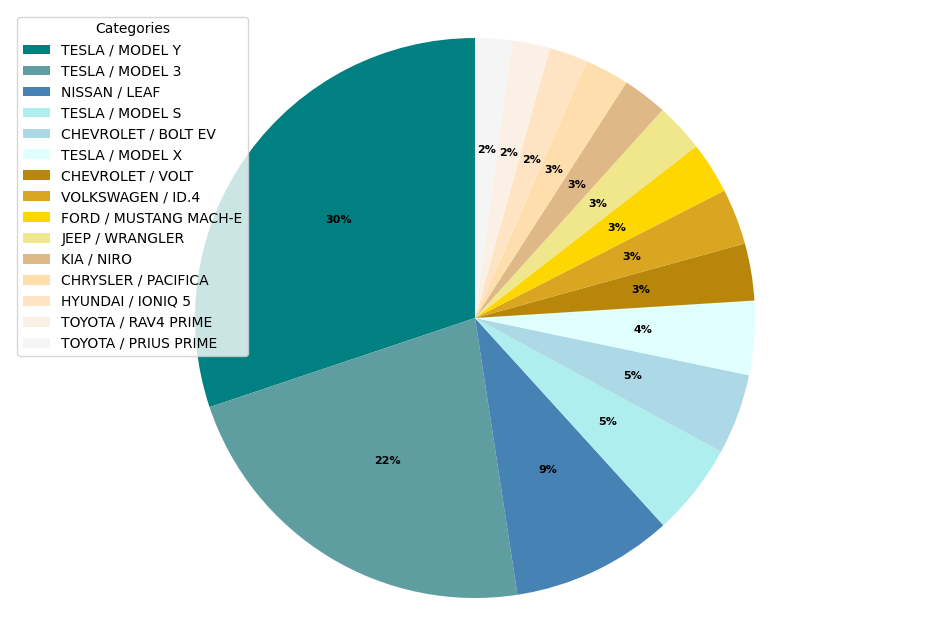

<Figure size 640x480 with 0 Axes>

In [217]:
labels=popularEV_15['Make_Model']
sizes=popularEV_15['Count']
colors = [
    "teal",
    "cadetblue",
    "steelblue",
    "paleturquoise",
    "lightblue",
    "lightcyan",
    "darkgoldenrod",
    "goldenrod",
    "gold",
    "khaki",
    "burlywood",
    "navajowhite",
    "bisque",
    "linen",
    "whitesmoke"
]
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(sizes, colors=colors, autopct='%1.0f%%', startangle=90)
plt.setp(texts, size=10)  # Set size of the labels
plt.setp(autotexts, size=8, weight='bold', color='black')  # Style the percentage labels
plt.legend(wedges, labels, title="Categories", loc="best", fontsize=10)
plt.axis("equal")
plt.show()
plt.savefig("output_data/Top15_Popular_EVs%Pie.png")

In [101]:
# Narrowed down the initial list with only Make_Models that have an Electric Range >0 and created a summary statistics to determine which cars will be used for the Electric Range vs Poularity correlation
ev_popularity_stats=EV_df[EV_df["Electric Range"]>0]

summary_stats = ['mean','median','var','std','sem']
agg_ev_popularity=ev_popularity_stats.groupby(['Make_Model']).agg({'Electric Range': summary_stats})

agg_ev_popularity.columns = ['_'.join(col).strip() for col in agg_ev_popularity.columns.values]
agg_ev_popularity.to_csv("output_data/summarystats.csv")
agg_ev_popularity

,Electric Range_mean,Electric Range_median,Electric Range_var,Electric Range_std,Electric Range_sem
Make_Model,,,,,
ALFA ROMEO / TONALE,33.000000,33.0,0.000000,0.000000,0.000000
AUDI / A3,16.000000,16.0,0.000000,0.000000,0.000000
AUDI / A7 E,24.000000,24.0,0.000000,0.000000,0.000000
AUDI / A8 E,17.000000,17.0,0.000000,0.000000,0.000000
AUDI / E-TRON,207.693721,204.0,52.924454,7.274920,0.284690
...,...,...,...,...,...
VOLVO / S90,24.777778,21.0,51.377778,7.167829,1.194638
VOLVO / V60,38.354430,41.0,43.821487,6.619780,0.744783
VOLVO / XC60,26.923414,35.0,74.863473,8.652368,0.233677


In [113]:
#Keep Make_models with sem <0.1
cars_for_correlation = agg_ev_popularity[agg_ev_popularity["Electric Range_sem"]<0.1]
selected_cars = cars_for_correlation.iloc[:,[0]]
selected_cars.head()

,Electric Range_mean
Make_Model,
ALFA ROMEO / TONALE,33.0
AUDI / A3,16.0
AUDI / A7 E,24.0
AUDI / A8 E,17.0
AUDI / E-TRON SPORTBACK,218.0


In [149]:
#Merge the selected cars and the grouped cars to create a table for the correlation 

merge = pd.merge(groupedEV_count,selected_cars, on='Make_Model', how='left')
merge1 = merge.dropna()
merge1=merge1.reset_index(drop=True)
#merge1

y = 0.01x +48.47
The r^2-value is: 0.2220167159514019


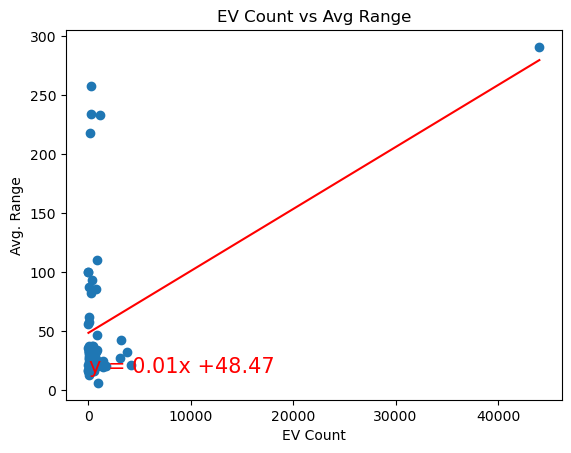

<Figure size 640x480 with 0 Axes>

In [219]:
# Create x and y values for the correlation chart
x_values = merge1['Count']
y_values = merge1['Electric Range_mean']

# Perform a linear regression on Model Count vs. Average Range
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('EV Count')
plt.ylabel('Avg. Range')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"EV Count vs Avg Range")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("output_data/EVcount_VS_AvgElectricRange.png")

In [ ]:
# While it's not very high, 22% suggests that the model explains some variability, but there’s a significant amount of unexplained variance (78%). 
# This means other factors or variables not included in the model may play a role in influencing the "popularity" of EVs.